#  Laboratorium z Podstaw Przetwarzania Sygnałów
## Laboratorium 3 - Harmoniczne

prowadzący: dr inż. Łukasz Jeleń  
  
Dzisiejsze zadania pochodzą z Allen B. Downey, Think DSP, Digital Signal Processing in Python, Green Tea Press, Wersja 1.0.5

Nazwisko i Imię: Jan Zieniewicz  
Nr albumu: 263930  
data wykonania ćwiczenia: 8.11.2022   

w celu zachowania przeniesienia do kolejnej linii należy się upewnić, że na końcu linii znajduje się 2x spacja

## Zestaw narzędzi  

Na poprzednich zajęciach poznali Państwo narzędzia udostępnionne przez Autora podręcznika "Think DSP". W poniższej komórce macie Państo dane do ich pobrania - dla przypomnienia. 

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Na laboratorium zaznajomią się Państwo z kilkoma rodzajami sygnałów oraz ich spektrum. Celem jest zrozumienie ich struktury harmonicznych, co często nazywane jest poprostu brzmieniem. Składają się na nie proste sinusoidy. Niemniej jednak ich oddziaływanie jest często bardzo złożone i zmienne. W dalszej części zapoznamy się także z bardzo poulrnym w przetarzaniu sygnałów aliasingiem.

## Kształt sygnału i harmoniczne

### Sygnał trójkątny

Utworzymy i wyświetlimy sygnał trójkątny (dla trzech okresów), czyli taki, w którym amplituda rośnie liniowo do połowy okresu, a później liniowo maleje aż do końca okresu. 

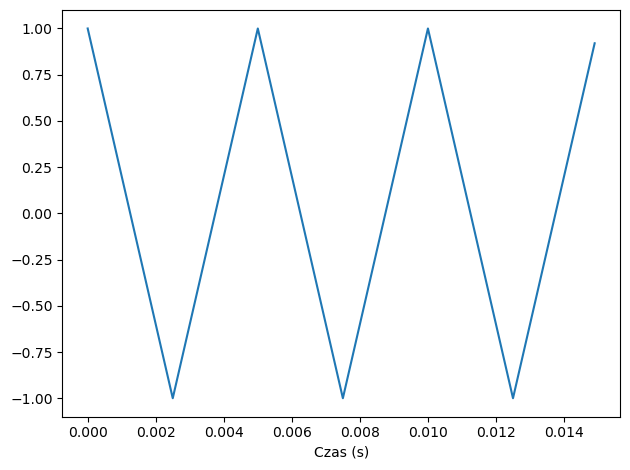

In [2]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Czas (s)')

A zamienimy sygnał na dźwięk

In [3]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Teraz wyznaczymy spektrum sygnału. 

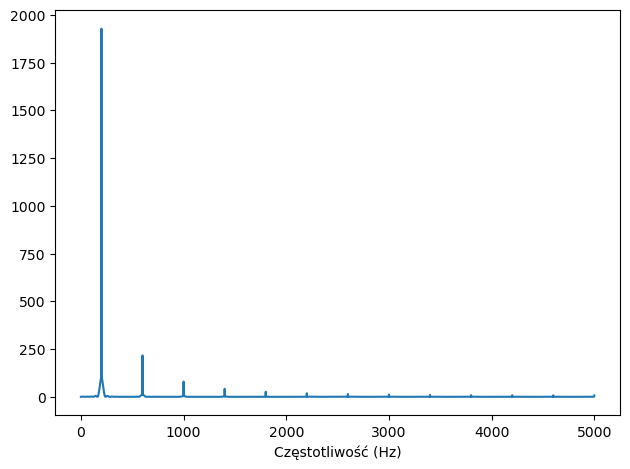

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Częstotliwość (Hz)')

### Sygnał prostokątny 
Teraz powtórzymy powyższe kroki, ale dla synagłu prostokątnego

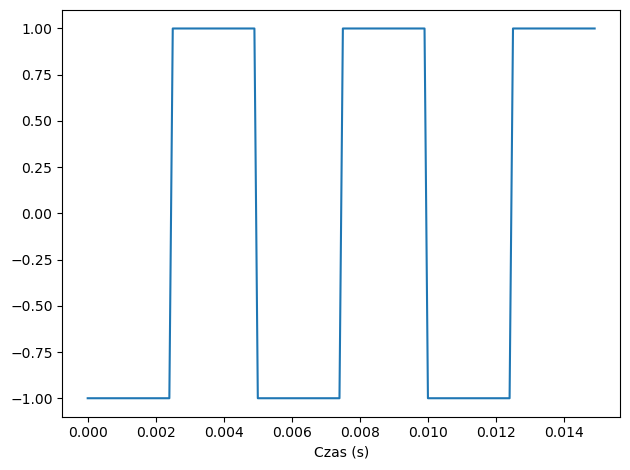

In [5]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Czas (s)')

In [6]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Spektrum

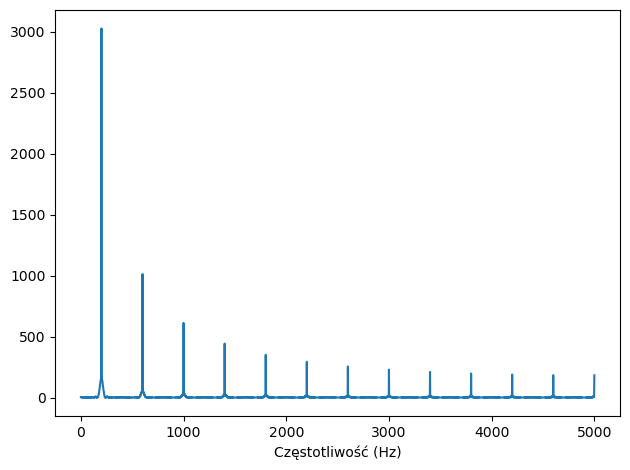

In [7]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Częstotliwość (Hz)')

### Sygnał Piłokształtny
Teraz powtórzymy powyższe kroki, ale dla synagłu piłokształtnego

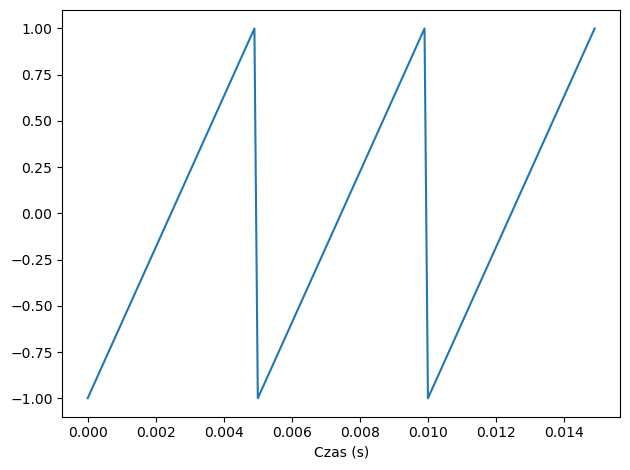

In [8]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Czas (s)')

In [9]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Spektrum

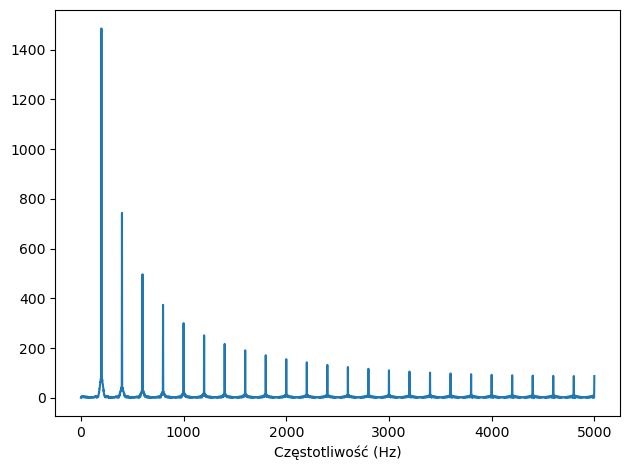

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Częstotliwość (Hz)')

## Aliasing

W tym ćwiczeniu, utworzymy sygnał kosinusowy o częstotliwości 4500 Hz, a następnie utorzymy falę z częstotliwością 10 kHz, a następnie wyświetlimy 5 okresów.

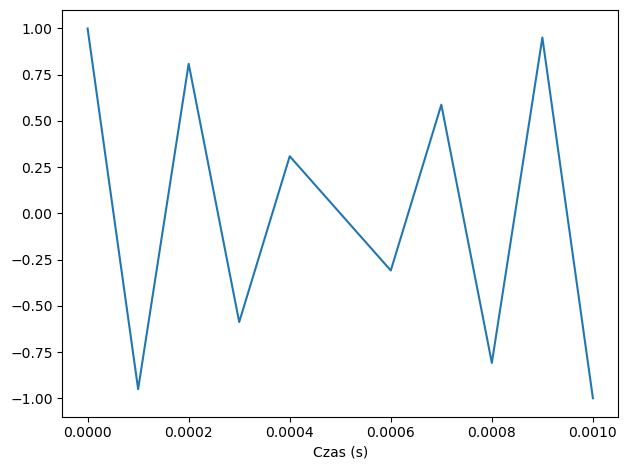

In [11]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Czas (s)')

Teraz utworzymy sygnał kosinusowy o częstotliwości 5500 Hz, a następnie utorzymy falę z częstotliwością 10 kHz, a następnie wyświetlimy 5 okresów.

Przy częstotliwości 10 kHz, częstotliwość Nyquista równa jest 5 kHz, dlatego sygnał 4500 Hz oraz sygnał 5500 wyglądają dokładnie tak samo.

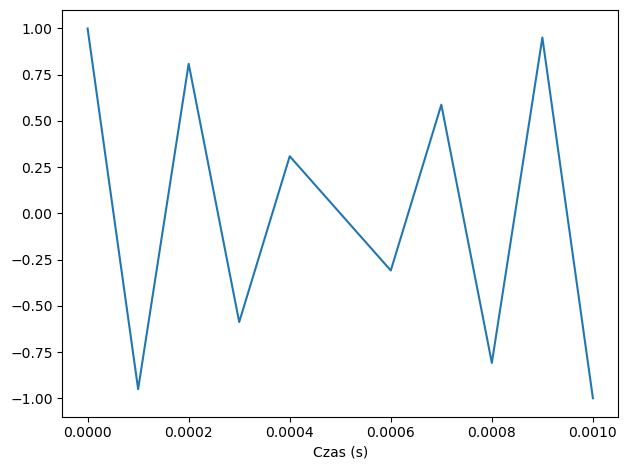

In [12]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Czas (s)')

## Amplituda i faza

zaczniemy od utworzenia sygnału piłokształtnego. 

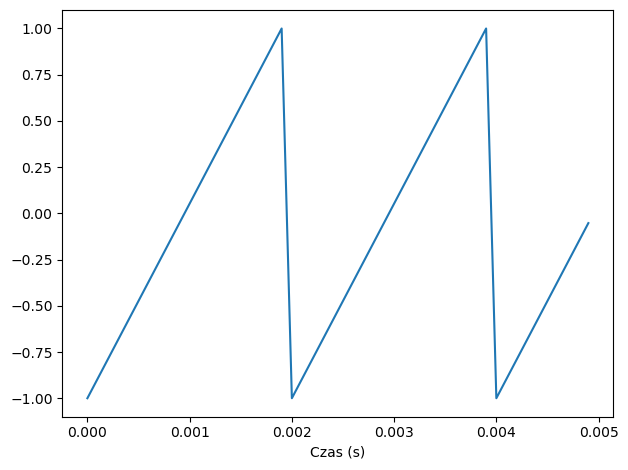

In [13]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Czas (s)')

In [14]:
wave.make_audio()

Na podstawie powyższego sygnału stworzymy macierz, którą wykorzystamy do wyznaczenia szybkiej transformaty Fouriera (FFT) dla danych będącymi liczbami rzeczywistymi (rFFT).

In [15]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

Teraz wyznaczymy częstotliwości, które pokrywają się z elemntami FFT.

In [16]:
n = len(wave.ys)                 # Ilość próbek
d = 1 / wave.framerate           # czas próbkowania
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Wykres wartość vs. częstotliwość.

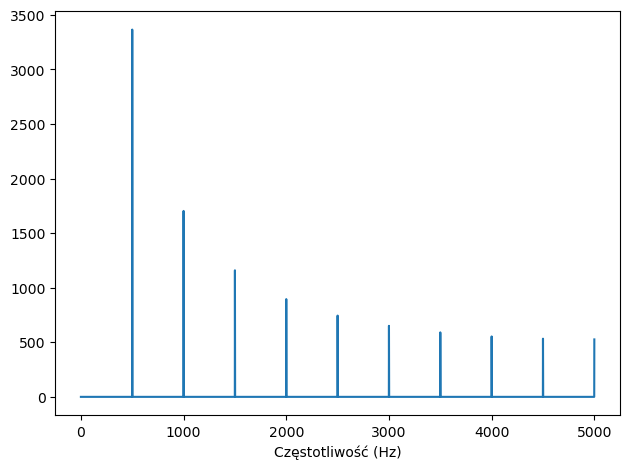

In [17]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Częstotliwość (Hz)')

Wykres faza vs. częstotliwości.

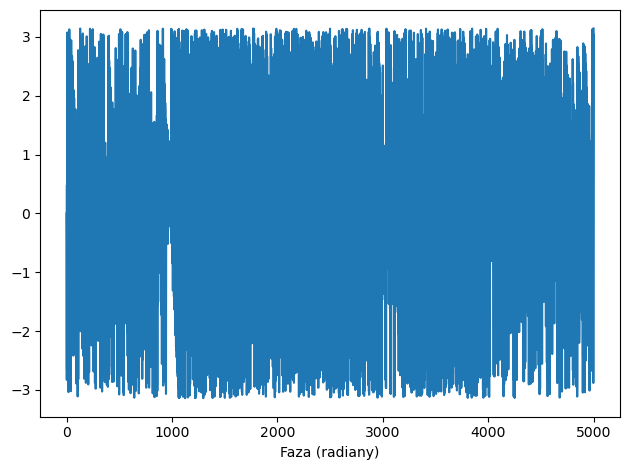

In [18]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Faza (radiany)')

## A jak brzmi faza?

Pomieszamy fazę.

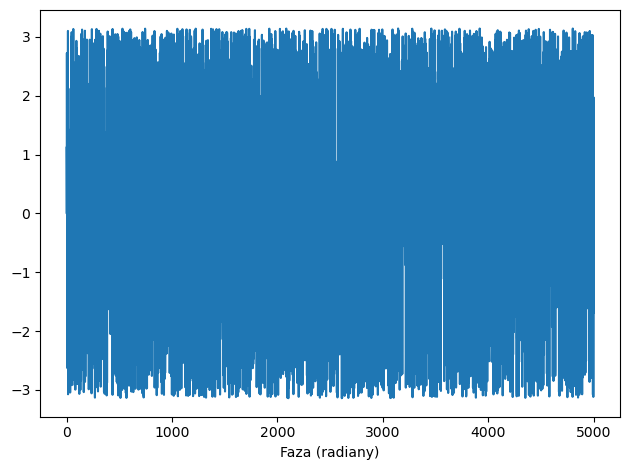

In [19]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Faza (radiany)')

Teraz dodamy pomieszaną fazę spowrotem do spectrum. Każdy lement w `hs` jest liczbą zespoloną o module $A$ i fazie $\phi$, dla których możemy wyznaczyć $A e^{i \phi}$

In [20]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

spectrum.hs

array([ 2.24567279e-13+4.59667981e-13j,  2.42603085e-13+8.67083398e-14j,
        2.20137700e-13-9.68252586e-16j, ...,
        7.58659907e-14+4.14138696e-13j, -2.21012573e-13+5.21290635e-13j,
       -6.09594849e+01-5.22773614e+02j])

Zamiana spektrum na falę dźwiękową (za pomocą irfft).

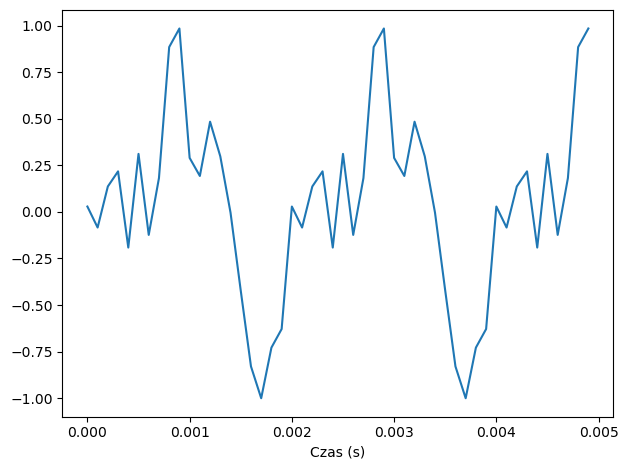

In [21]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Czas (s)')

In [22]:
wave2.make_audio()

Dla porównania oryginał:

In [23]:
wave.make_audio()

Mimio, że oba sygnały mają inny kształt fali, to posiadają te same składowe częstotliwości o takiej samej amplitudzie. Różnią się tylko fazą.

## Wpływ aliasingu

Pniższy kod przedstawia oddziaływania będące efektem aliasingu na harmoniczne sygnału piłokształtnego.

In [24]:
def view_harmonics(freq, framerate):
    """ Wykres przedstawiający spektrum dla sygnału piłokształtnego.
    
    freq: częstotliwość w Hz
    framerate: w ramki/sekunda
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Częstotliwość (Hz)', ylabel='Amplituda')
    display(wave.make_audio())

In [25]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

## Zadania

### Zadanie 1  

Stwórz sygnał prostokątny o częstotliwości 1100 Hz a następnie utwórz falę, która będzie prókowała stworzony sygnał z częstotliwością 10000 ramek na sekundę. Na wykresie spektrum powini Państwo zobaczyć, że większość harmonicznych uległa aliasingowi. Czy po odegraniu dźwięku dało się usłyszeć harmoniczne po aliasingu?

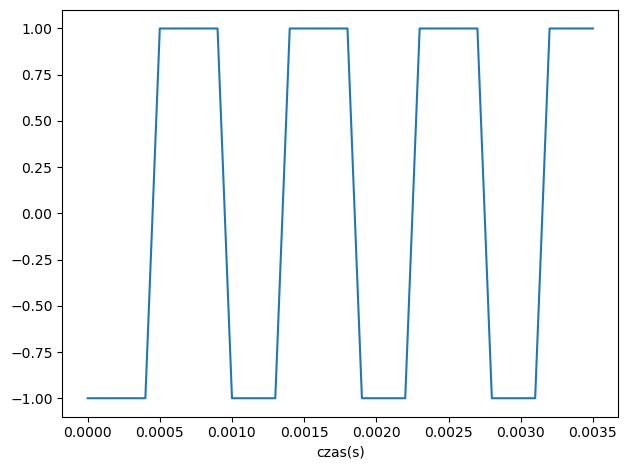

In [26]:
from thinkdsp import SquareSignal, decorate

syg=SquareSignal(1100)
dur=syg.period*4
seg=syg.make_wave(dur,framerate=10000)
seg.plot()
decorate(xlabel="czas(s)")

In [27]:
fala=syg.make_wave(duration=0.5, framerate=10000)
fala.apodize()
fala.make_audio()

### Zadanie 2

Mając dany obiekt spektrum, `spectrum` wyświetl kilka pierwszych wartości dla `spectrum.fs`. Z wykresu łatwo zauważć, że `spectrum.hs[0]` jest modułem składowej o częstotliwości $0$. Co to znaczy?  

Wykonaj doświadczenie:

1. Stwórz sygnał trójkątny o częstotliwości 440 Hz i utwórz falę o długości $0.01 s$. Przedtaw na wykresie.
2. Stwórz obiekt `spectrum`i wyświetl `spectrum.hs[0]`. Jaka jest amplituda i faza tej składowej?
3. Ustaw `spectrum.hs[0] = 100`. Utwórz falę na podstawie zmodyfikowanego spektrum i wyświetl. Jaki wpływ będzie miała ta operacja na kształt sygnału?

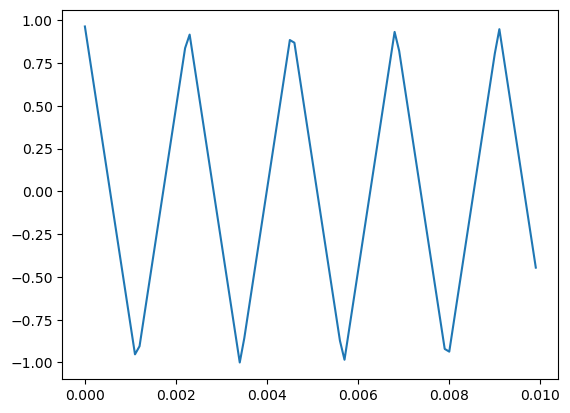

In [28]:
from thinkdsp import TriangleSignal

# 1 częsć polecenia
fala=TriangleSignal(440)
seg=fala.make_wave(0.01, framerate=10000)
seg.plot()



(3.375077994860476e-14+0j)


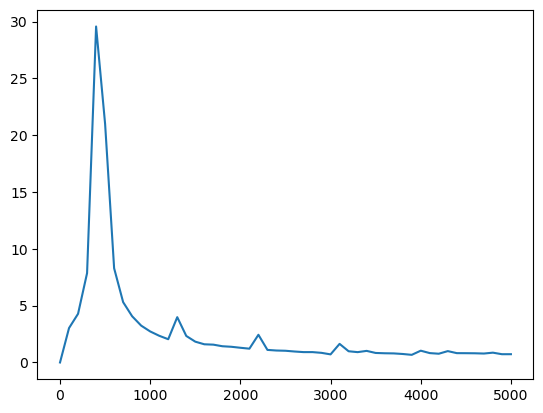

In [29]:
spectrumi=seg.make_spectrum()
print(spectrumi.hs[0])
spectrumi.plot()
fala1=spectrumi.make_wave()
fala1.apodize()
fala1.make_audio()

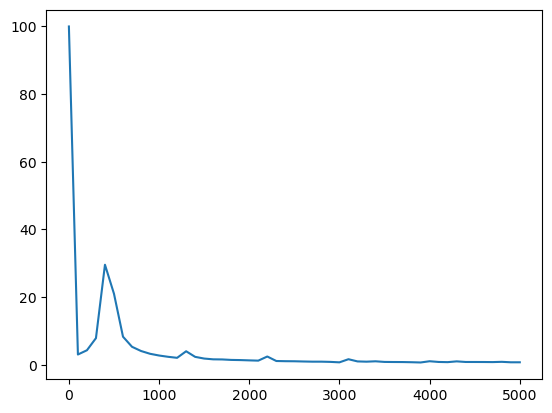

In [30]:
spectrumi.hs[0]=100
spectrumi.plot()
fala2=spectrumi.make_wave()
fala2.apodize()
fala2.make_audio()

### Zadanie 3  
  
Napisz funkcję, która pobiera `spectrum` jako parametr, a następnie modyfikuje je poprzez podzielenie każdego elemntu `hs` przez odpowiadające im częstotliwości z `fs`.   
  
#### WSKAZÓWKA
Z uwagi na fakt dzieeinia przez 0, można ustawić `spectrum.hs[0] = 0`.
  
Przetestuj swoje rozwiązanie na sygnałach kwadratowym, trójkątnym i piłokształtnym.
1. Wyznacz spektrum i je wyświelt na wykresie.
2. Zmodyfikuj otrzymane spektrum z wykorzystaniem swojej funkcji. Wyświetl wynik 
3. Ze zmodyfikowanego spektrum utwórz falę dźwiękową i odsłuchaj. 
  
Jaki był efekt powyższych operacji dla sygnałów wejściowych?

In [31]:
print(spectrum.hs)

[ 2.24567279e-13+4.59667981e-13j  2.42603085e-13+8.67083398e-14j
  2.20137700e-13-9.68252586e-16j ...  7.58659907e-14+4.14138696e-13j
 -2.21012573e-13+5.21290635e-13j -6.09594849e+01-5.22773614e+02j]


In [32]:
def funkcja(spektrum):
    for i in range(len(spektrum.fs)):
        if spektrum.fs[i]==0:
            spektrum.hs[i]= 0
            #print("1")
        else:
            spektrum.hs[i]=spektrum.hs[i]/spektrum.fs[i]
            #print("1")
    print(spektrum.hs)
    return spektrum
    

#### Spektrum kontrolne:

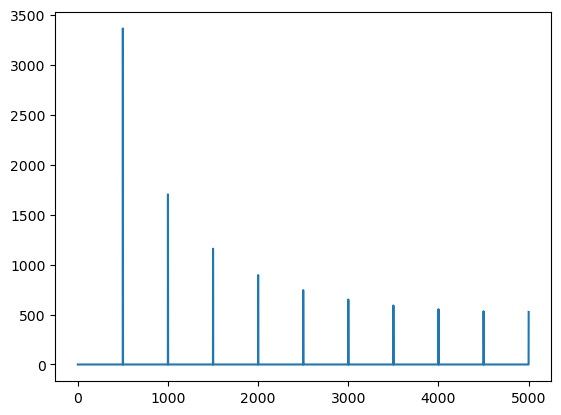

In [33]:
wave_kontrol=spectrum.make_wave()
spectrum.plot()
wave_kontrol.make_audio()

#### Spektrum po zmianie:

[ 0.00000000e+00+0.00000000e+00j  2.42603085e-13+8.67083398e-14j
  1.10068850e-13-4.84126293e-16j ...  1.51792698e-17+8.28608836e-17j
 -4.42113569e-17+1.04278983e-16j -1.21918970e-02-1.04554723e-01j]


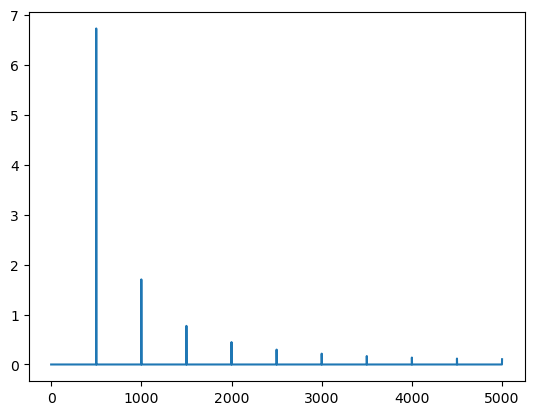

In [34]:
noweSpektrum=funkcja(spectrum)
noweSpektrum.plot()
wave=noweSpektrum.make_wave()
wave.make_audio()
